# Setup

Look nice plotting:

In [1]:
## web graphics
%matplotlib inline
## interactive graphics/
#%matplotlib notebook
%config InlineBackend.figure_format = 'png' 

science libraries (using autograd instead of tensorflow for easy prototyping)

In [2]:
import autograd.numpy as np
import autograd.scipy as sp
from autograd import grad
from autograd.util import flatten_func
import seaborn as sns
import librosa
from importlib import reload
import matplotlib.pyplot as plt
from librosa.display import specshow
# display more of the array
np.set_printoptions(edgeitems=5)
from librosa.display import waveplot
from pathlib import Path
from IPython.display import Javascript
import json
#runs arbitrary javascript, client-side


In [3]:
%%javascript
// install tone.js
require.config({
  paths: {
      tone: '//tonejs.github.io/CDN/latest/Tone'
  }
});
require(['tone'], (t)=>{window.Tone=t})

<IPython.core.display.Javascript object>

# Doing things

In [4]:
Javascript("""
window.buffer=new Tone.Buffer(
    'samples/clarinet.mp3',
        ()=>element.append(
            String(window.buffer.get().duration + 
            " seconds loaded"
        )
    )
);
""")

<IPython.core.display.Javascript object>

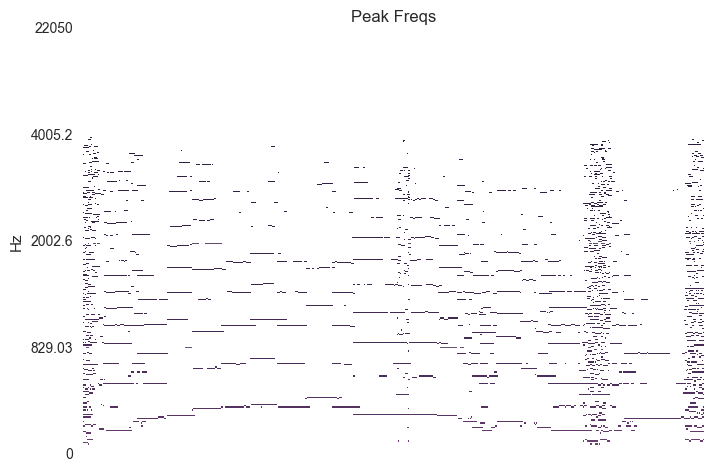

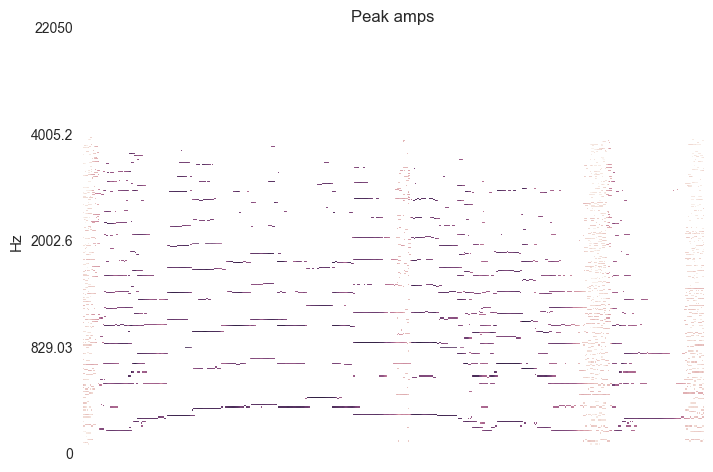

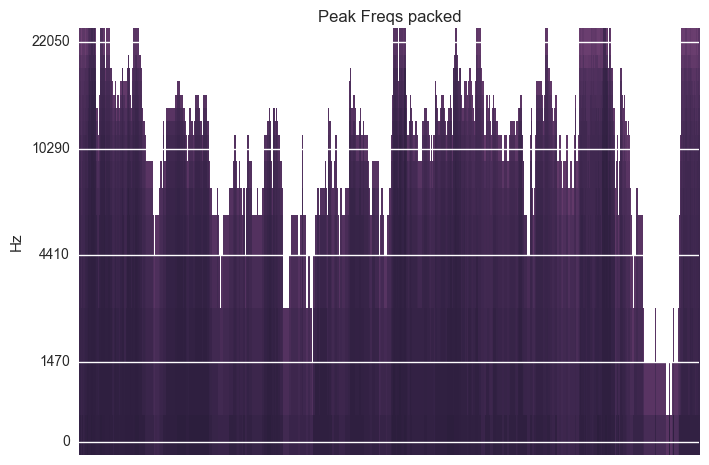

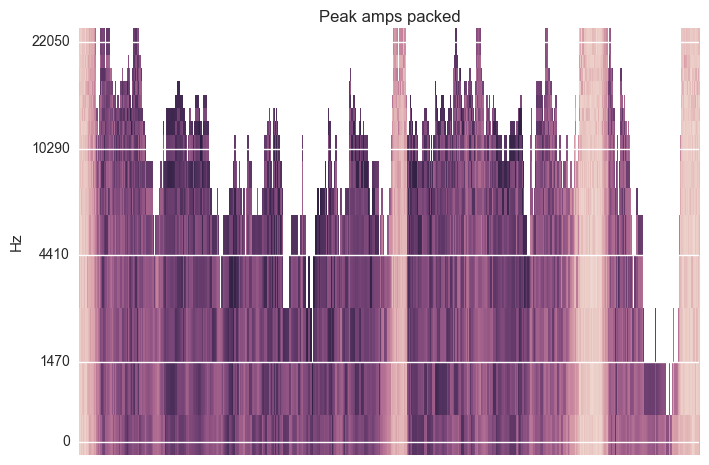

In [5]:
import src.danscriptors.array_ops as array_ops
import src.danscriptors.analysis as analysis
array_ops = reload(array_ops)
analysis = reload(analysis)
source_features = analysis.harmonic_index('samples/clarinet.mp3', debug=True, cached=False)


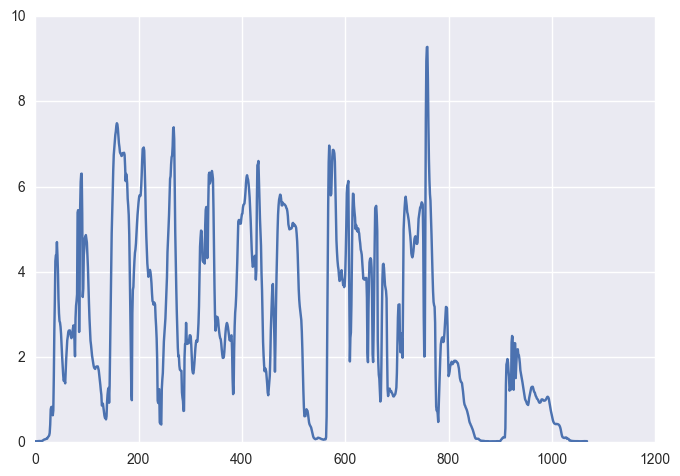

In [6]:
plt.plot(source_features['harm_rms'].ravel());

In [7]:
k=500
target_features = dict(
    rms=source_features['rms'][:, k],
    peak_f=source_features['peak_f'][:, k],
    peak_power=source_features['peak_power'][:, k],
)

In [8]:
target_features

{'peak_f': array([ 2347.95336914,  2056.60424805,  1763.6583252 ,  1174.62011719,
          881.91387939,   293.17218018,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ], dtype=float32),
 'peak_power': array([   545.89324951,   1182.26416016,    695.11029053,   1789.32507324,
         44836.06640625,   4432.76367188,      0.        ,      0.        ,
             0.        ,      0.        ,      0.        ,      0.        ,
             0.        ,      0.        ,      0.        ,      0.        ], dtype=float32),
 'rms': array([ 6.3510747], dtype=float32)}

In [22]:
import src.numpyjson as npjson
NumpyJSONEncoder = reload(npjson).NumpyJSONEncoder
encode_numpy = reload(npjson).encode_numpy


In [23]:
json.dumps(optimum, default=encode_numpy)

'{"gain": [0.0, 0.0, 0.0, 0.0, 0.0, 0.3950620131106108, 0.0, 0.3539265348793178], "start_sample": [850944, 977920, 960512, 520192, 13312, 731136, 576512, 620544], "rate": [1.08823364228531, 1.0761055571224523, 1.0251383426629188, 2.3896370547510872, 1.0037029391578214, 1.377979731634264, 1.012015946398908, 4.9797203174694085], "start_time": [19.29578231292517, 22.175056689342405, 21.78031746031746, 11.795736961451247, 0.301859410430839, 16.579047619047618, 13.072834467120181, 14.071292517006803], "start_frame": [829, 953, 936, 506, 11, 712, 561, 604]}'

In [16]:
import src.danscriptors.resynthesis as resynthesis
resynthesis = reload(resynthesis)
optimum = resynthesis.harmonic_synthesis(source_features, target_features)
print(optimum)
enc.dumps(optimum)


{'gain': array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.39506201,  0.        ,  0.35392653]), 'start_sample': array([850944, 977920, 960512, 520192,  13312, 731136, 576512, 620544]), 'rate': array([ 1.08823364,  1.07610556,  1.02513834,  2.38963705,  1.00370294,
        1.37797973,  1.01201595,  4.97972032]), 'start_time': array([ 19.29578231,  22.17505669,  21.78031746,  11.79573696,
         0.30185941,  16.57904762,  13.07283447,  14.07129252]), 'start_frame': array([829, 953, 936, 506,  11, 712, 561, 604])}


AttributeError: 'NumpyJSONEncoder' object has no attribute 'dumps'

In [30]:
import src.danscriptors.resynthesis as resynthesis
resynthesis = reload(resynthesis)
optimum = resynthesis.harmonic_synthesis(source_features, target_features)
print(optimum)
import src.danscriptors.sc_play as sc_play
sc_play = reload(sc_play)
sc_play.file(str(Path('samples/clarinet.mp3').resolve()))
sc_play.note(**optimum)

{'rate': array([ 1.00057626,  1.00127917,  1.00019046,  0.99735078,  0.99545644,
        1.0814498 ,  1.00238893,  1.00334784]), 'start_sample': array([ 560128,  541696, 1091584,  155648,  258048,  339968,  292864,
        510976]), 'start_time': array([ 12.70131519,  12.28335601,  24.75247166,   3.52943311,
         5.85142857,   7.70902494,   6.64090703,  11.58675737]), 'gain': array([ 0.1454807 ,  0.15893987,  0.14355712,  0.5204893 ,  0.19029164,
        0.70515825,  0.17227941,  0.28286225]), 'start_frame': array([ 545,  527, 1064,  150,  250,  330,  284,  497])}


In [31]:
optimum = resynthesis.harmonic_synthesis(source_features, target_features)
# sc_play.file(str(Path('samples/clarinet.mp3').resolve()))
sc_play.note(**optimum)

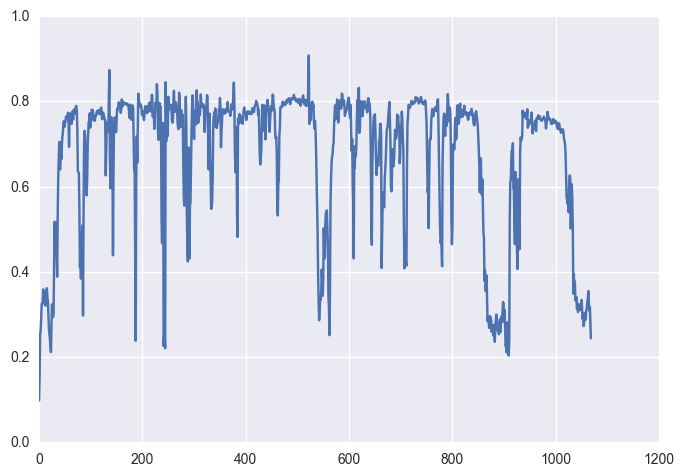

In [32]:
plt.plot((source_features['harm_rms']/source_features['rms']).ravel()); # noisiness 

In [14]:
Javascript("""
window.FOO="splotch";
""")

<IPython.core.display.Javascript object>

In [15]:
%%javascript
element.append('<p>'+window.FOO+'</p>')

<IPython.core.display.Javascript object>